In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [15]:
df['country_only'] = df['customer_country'].apply(lambda x: 'e-mail' if pd.notnull(x) and '@' in x else (x.split('/')[-1].strip() if pd.notnull(x) and '//' not in x else np.nan))

df_country_only = df.dropna(subset=['country_only'])

converted_counts_country_only = df_country_only.groupby('country_only')['is_converted'].sum().reset_index()
total_counts_country_only = df_country_only.groupby('country_only')['is_converted'].count().reset_index()

ratio_df_country_only = pd.merge(converted_counts_country_only, total_counts_country_only, on='country_only', how='left')
ratio_df_country_only['conversion_ratio'] = ratio_df_country_only['is_converted_x'] / ratio_df_country_only['is_converted_y']

for index, row in ratio_df_country_only.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    # print(f"{row['country_only']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")


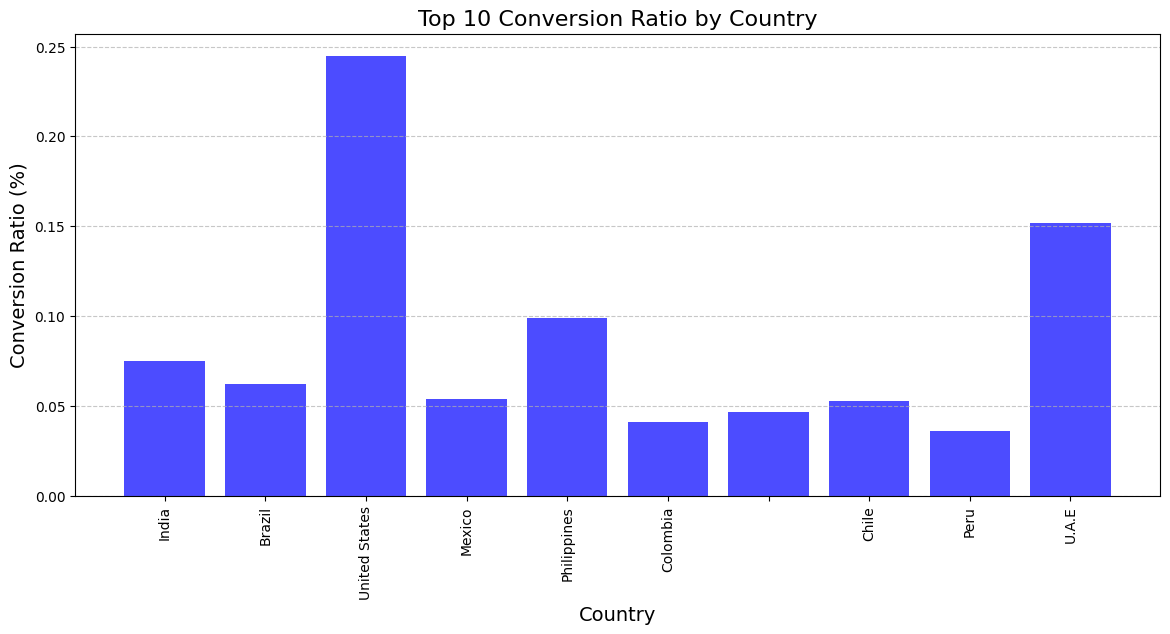

India 별 is_converted 비율: 7.48%, 전체 갯수: 13804, is_converted된 갯수: 1032
Brazil 별 is_converted 비율: 6.23%, 전체 갯수: 8155, is_converted된 갯수: 508
United States 별 is_converted 비율: 24.49%, 전체 갯수: 2826, is_converted된 갯수: 692
Mexico 별 is_converted 비율: 5.37%, 전체 갯수: 2310, is_converted된 갯수: 124
Philippines 별 is_converted 비율: 9.90%, 전체 갯수: 1859, is_converted된 갯수: 184
Colombia 별 is_converted 비율: 4.09%, 전체 갯수: 1515, is_converted된 갯수: 62
 별 is_converted 비율: 4.67%, 전체 갯수: 1306, is_converted된 갯수: 61
Chile 별 is_converted 비율: 5.30%, 전체 갯수: 1057, is_converted된 갯수: 56
Peru 별 is_converted 비율: 3.60%, 전체 갯수: 999, is_converted된 갯수: 36
U.A.E 별 is_converted 비율: 15.20%, 전체 갯수: 954, is_converted된 갯수: 145
가공이 필요없는 멀쩡한 데이터 갯수 :  34785
전체 비율 :  58.66034840385167


In [17]:
top_countries = ratio_df_country_only.nlargest(10, 'is_converted_y')

plt.figure(figsize=(14, 6))
plt.bar(top_countries['country_only'], top_countries['conversion_ratio'], color='blue', alpha=0.7)

plt.title('Top 10 Conversion Ratio by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)

plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

a = 0
temp = 59299

for index, row in top_countries.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['country_only']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")
    a += total

print("가공이 필요없는 멀쩡한 데이터 갯수 : ", a)
print("전체 비율 : ", a/temp*100)

